### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots


### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [4]:
data.info()
#using info, it was observed that car, Bar, CoffeeHouse, CarryAway, RestaurantLessThan20, and Restaurant20To50 all contain some null values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

3. Decide what to do about your missing data -- drop, replace, other...

In [5]:
# car column presented very little information so it was decided to drop that column as the data was not usefull
# The rest of the columns are object types, the rows that indicate a nan are minimal so those rows were dropped
data_rm = data.drop(columns="car")
# rename misspelled passenger column
data_rm = data_rm.rename(columns={"passanger": "passenger"})
# transform below21 and plus50 to greater than and less than notations
data_rm.loc[data_rm['age']=='below21','age'] = '<21'
data_rm.loc[data_rm['age']=='50plus','age'] = '>50'
Coupon_names = ['Bar','CoffeeHouse','CarryAway',
                'RestaurantLessThan20','Restaurant20To50']
coupon_inputs = ['1~3', '4~8', 'gt8', 'less1', 'never']
for c in Coupon_names:
    data_rm[c] = data_rm[c].replace(np.nan, 'Unknown', regex=True)
    data_rm[c] = data_rm[c].replace('1~3', '1-3', regex=True)
    data_rm[c] = data_rm[c].replace('4~8', '4-8', regex=True)
    data_rm[c] = data_rm[c].replace('gt8', '>8', regex=True)
    data_rm[c] = data_rm[c].replace('less1', '<1', regex=True)
    data_rm[c] = data_rm[c].replace('never', '0', regex=True)

        



In [6]:
# check if all nans were cleared
data_rm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passenger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  Bar                   12684 non-null  object
 15  CoffeeHouse           12684 non-null

4. What proportion of the total observations chose to accept the coupon? 



In [7]:
num_accept = sum(data_rm['Y'] == 1)/len(data_rm)*100
print(num_accept)
#~57% of total observations accepted a coupon

56.84326710816777


5. Use a bar plot to visualize the `coupon` column.

In [8]:
fig = px.histogram(data_rm, x="coupon",
             title='Total Coupons Given Grouped by Type')
fig.show()


6. Use a histogram to visualize the temperature column.

In [9]:
fig = px.histogram(data_rm, x="temperature",
             title='Total Credit Amounts Grouped by Purpose')
fig.show()
np.unique(data_rm['age'])

array(['21', '26', '31', '36', '41', '46', '<21', '>50'], dtype=object)

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [10]:
Bar_data = data_rm[data_rm['coupon']=='Bar']


2. What proportion of bar coupons were accepted?


In [11]:
num_accept_bar = sum(Bar_data['Y'] == 1)/len(Bar_data)*100
print(num_accept_bar)
#~41% of Bar Coupons were accepted

41.00148735746158


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [12]:
thr_few = ['1-3','<1', '0']
mor_thr = ['4-8', '>8']
thr_few_mask = np.isin(Bar_data['Bar'],thr_few)
mor_thr_mask = np.isin(Bar_data['Bar'],mor_thr)
few_thr_data = Bar_data[thr_few_mask]
mor_thr_data = Bar_data[mor_thr_mask]
few_thr_accp = sum(few_thr_data['Y'] == 1)/len(few_thr_data)*100
mor_thr_accp = sum(mor_thr_data['Y'] == 1)/len(mor_thr_data)*100
print(few_thr_accp)
print(mor_thr_accp)

37.061769616026716
76.88442211055276


In [13]:
# As expected those that declared that they went three or fewer times a month vs three or more denied the Coupon at a higher rate.
lst = ['Three or Fewer','More than Three']
labels = ['Accepted','Denied']
rows = 1
cols = 2

subplot_titles = ['Three or Fewer','More than Three']
fig = make_subplots(rows=1, cols=2, subplot_titles=subplot_titles, print_grid=True, specs=[[{'type':'domain'}, {'type':'domain'}]])

fig.add_trace(go.Pie(labels=labels, values=[few_thr_accp,(100-few_thr_accp)]),
1, 1)
fig.add_trace(go.Pie(labels=labels, values=[mor_thr_accp,(100-mor_thr_accp)]),
1, 2)
    
fig.update_layout(title="Acceptance Rates Separated by Number of Visits", title_x=0.5)
fig.show()

This is the format of your plot grid:
[ (1,1)  ]  [ (1,2)  ]



4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [14]:
ages_gt25 = ['26', '31', '36', '41', '46', '>50']
mor_1 = ['1-3','<1','0']
fewer = ['4-8', '>8']
mor_1and25_mask = np.isin(Bar_data['Bar'],mor_1) & np.isin(Bar_data['age'],ages_gt25)
data_split = Bar_data[mor_1and25_mask]
rest = Bar_data[mor_1and25_mask == False]

few_accp = sum(data_split['Y'] == 1)/len(data_split)*100
rest_accp = sum(rest['Y'] == 1)/len(rest)*100

In [15]:
# The group going one or more times a month and are greater than the Age of 25 denied the Bar Coupon more than
# the rest of participants <= 25 years old who went less than once a month.
labels = ['Accepted','Denied']
rows = 1
cols = 2

subplot_titles = ['One or More a Month & Greater than 25 yo','Other']
fig = make_subplots(rows=1, cols=2, subplot_titles=subplot_titles, print_grid=True, specs=[[{'type':'domain'}, {'type':'domain'}]])

fig.add_trace(go.Pie(labels=labels, values=[few_accp,(100-few_accp)]),
1, 1)
fig.add_trace(go.Pie(labels=labels, values=[rest_accp,(100-rest_accp)]),
1, 2)
    
fig.update_layout(title="Acceptance Rates Separated by Number of Visits and Age Filter", title_x=0.5)
fig.show()

This is the format of your plot grid:
[ (1,1)  ]  [ (1,2)  ]



5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [16]:
mor_1 = ['1-3','4-8', '>8']
nonkid_pass_mask = (Bar_data['passenger']=='kid(s)')==False
mor_1_mask = np.isin(Bar_data['Bar'],mor_1)
occp_notfff = (Bar_data['occupation']=='Farming Fishing & Forestry')==False
pool_mask = nonkid_pass_mask & mor_1_mask & occp_notfff

data_split = Bar_data[pool_mask]
rest = Bar_data[pool_mask == False]
few_accp = sum(data_split['Y'] == 1)/len(data_split)*100
rest_accp = sum(rest['Y'] == 1)/len(rest)*100

In [17]:
#Those who had more than one visit, no kid(s) in the car, and declared an occupation other than farming, fishing, and forestry, accepted
#the coupon more than those outside these categories.
labels = ['Accepted','Denied']
rows = 1
cols = 2

subplot_titles = ['1>visits, non kid passenger, non Farming Fishing & Forestry','Other']
fig = make_subplots(rows=1, cols=2, subplot_titles=subplot_titles, print_grid=True, specs=[[{'type':'domain'}, {'type':'domain'}]])

fig.add_trace(go.Pie(labels=labels, values=[few_accp,(100-few_accp)]),
1, 1)
fig.add_trace(go.Pie(labels=labels, values=[rest_accp,(100-rest_accp)]),
1, 2)
    
fig.update_layout(title="Acceptance Rates Separated by Number of Visits, type of passenger, and occupation Filter", title_x=0.5)
fig.show()

This is the format of your plot grid:
[ (1,1)  ]  [ (1,2)  ]



6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [18]:
mor_1 = ['1-3','4-8', '>8']
mor_4 = ['4-8', '>8']
nonkid_pass_mask = (Bar_data['passenger']=='kid(s)')==False
mor_1_mask = np.isin(Bar_data['Bar'],mor_1)
non_widowed = (Bar_data['maritalStatus']=='Widowed')==False
ages_lt30 = ['26', '<21']

und_30 = np.isin(Bar_data['age'],ages_lt30)
inc_less_50k =['$12500 - $24999', '$25000 - $37499','$37500 - $49999']
inc_less_50kmask = np.isin(Bar_data['income'],inc_less_50k)
mor_4cheap_mask = np.isin(Bar_data['RestaurantLessThan20'],mor_4)

onegroup = mor_1_mask & nonkid_pass_mask & non_widowed
twogroup = mor_1_mask & und_30
threegroup = mor_4cheap_mask & inc_less_50kmask

group_data = Bar_data[onegroup | twogroup | threegroup]
rest = Bar_data[(onegroup | twogroup | threegroup)==False]

grp_accp = sum(group_data['Y'] == 1)/len(group_data)*100
rest_accp = sum(rest['Y'] == 1)/len(rest)*100



In [19]:
# The filter requirements show that the filtered group had a higher acceptance rate than the other group.
labels = ['Accepted','Denied']
rows = 1
cols = 2

subplot_titles = ['Filtered Group','Other']
fig = make_subplots(rows=1, cols=2, subplot_titles=subplot_titles, print_grid=True, specs=[[{'type':'domain'}, {'type':'domain'}]])

fig.add_trace(go.Pie(labels=labels, values=[grp_accp,(100-grp_accp)]),
1, 1)
fig.add_trace(go.Pie(labels=labels, values=[rest_accp,(100-rest_accp)]),
1, 2)
    
fig.update_layout(title="Filtered Group Accp Rate vs Other", title_x=0.5)
fig.show()

This is the format of your plot grid:
[ (1,1)  ]  [ (1,2)  ]



7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

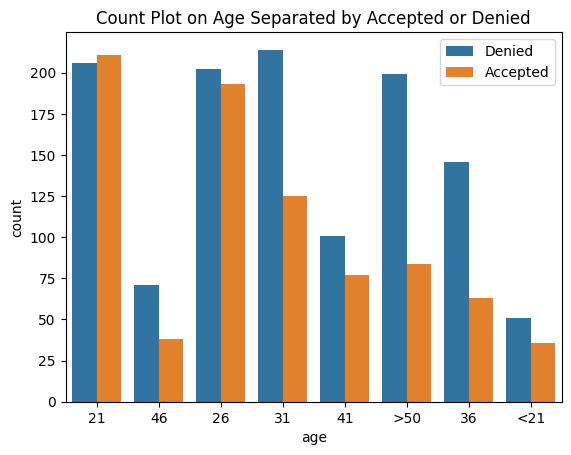

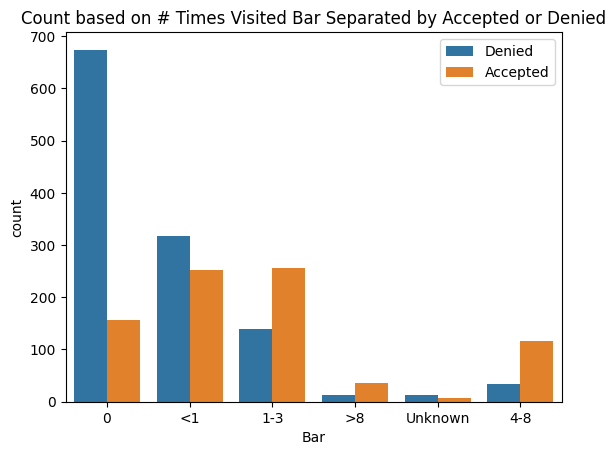

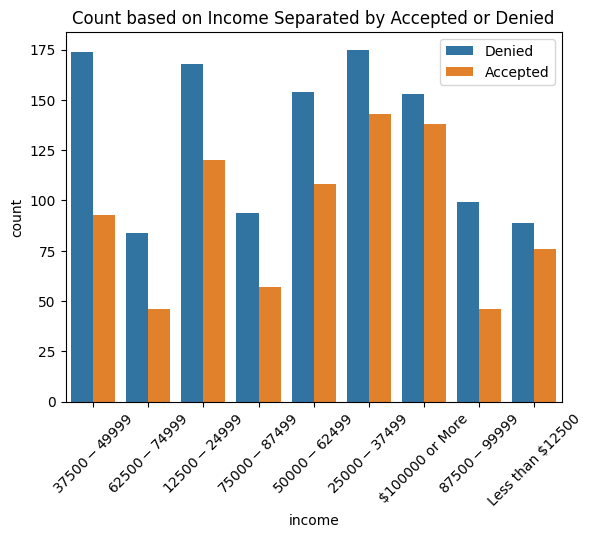

In [20]:
#Age and the number of visits I think is the main predictors that determine drivers who accept bar coupons.
#An additonal countplot provided below shows how much of the drivers are concentrated at 21 years old.
#It was observed that in the first figure those who declared they went three or more times were more likely to accept the coupon.
#Overall the income does not seem to show a specific range of drivers that accepted the bar coupon based on their income.
sns.countplot(Bar_data,x='age',hue='Y')
plt.title('Count Plot on Age Separated by Accepted or Denied')
plt.legend(loc='upper right', labels=['Denied', 'Accepted'])
plt.show()
sns.countplot(Bar_data,x='Bar',hue='Y')
plt.title('Count based on # Times Visited Bar Separated by Accepted or Denied')
plt.legend(loc='upper right', labels=['Denied', 'Accepted'])
plt.show()
sns.countplot(Bar_data,x='income',hue='Y')
plt.title('Count based on Income Separated by Accepted or Denied')
plt.legend(loc='upper right', labels=['Denied', 'Accepted'])
plt.xticks(rotation=45) 
plt.show()



### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [21]:
#For the independent investigation, the drivers that accepted a coffee house coupon were analyzed
Coffee_data = data_rm[data_rm['coupon']=='Coffee House']
accp_coffee = Coffee_data[Coffee_data['Y']==1]
denied_coffee = Coffee_data[Coffee_data['Y']==0]


In [22]:
#Wanted to see the distribution of occupations within the coffee house data 
fig = px.histogram(accp_coffee, x = 'occupation', title = 'Type of Occupation Distribution')
fig.show()
#It was observed that drivers under a student, unemployed, or Computer & Math occupation accepted a majority of the coffee house
#coupons.

In [23]:
#The data was filtered for drivers that declared a student, unemployed, or Computer & Math occupation to see the
#acceptance rate compared to the rest of the data.
occ_mask =  np.isin(Coffee_data['occupation'],['Student','Unemployed','Computer & Mathematical'])
foc_data = Coffee_data[occ_mask]
rest = Coffee_data[(occ_mask) == False]
foc_accp = sum(foc_data['Y'] == 1)/len(foc_data)*100
rest_accp = sum(rest['Y'] == 1)/len(rest)*100

In [24]:
#Overall the acceptance rate for this pool of drivers is slightly greater than the rest of the other occupations combined
labels = ['Accepted','Denied']
rows = 1
cols = 2

subplot_titles = ['Student/Unemployed/Comp & Math','Other']
fig = make_subplots(rows=1, cols=2, subplot_titles=subplot_titles, print_grid=True, specs=[[{'type':'domain'}, {'type':'domain'}]])

fig.add_trace(go.Pie(labels=labels, values=[foc_accp,(100-foc_accp)]),
1, 1)
fig.add_trace(go.Pie(labels=labels, values=[rest_accp,(100-rest_accp)]),
1, 2)
    
fig.update_layout(title="Student/Unemployed/Comp & Math vs Other", title_x=0.5)
fig.show()

This is the format of your plot grid:
[ (1,1)  ]  [ (1,2)  ]



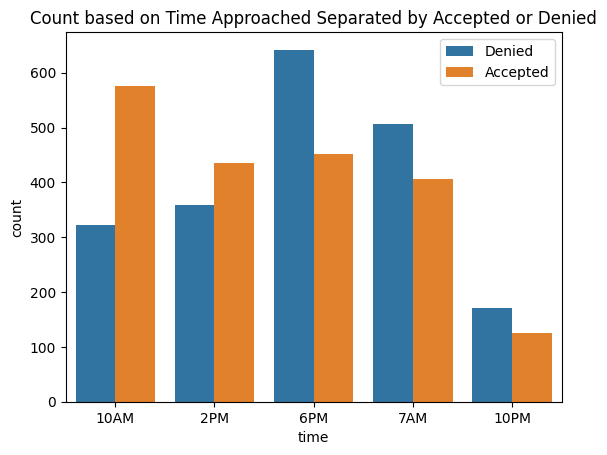

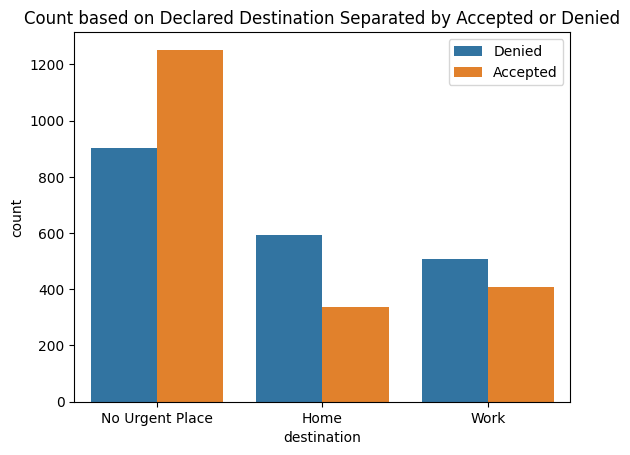

In [25]:
#Next wanted to observe if there was a specific time range and destination
#It was observed that the hours 10AM and 2PM were when the majority of the coffee coupon were accepted.
#It was also observed that "the no urgent" destination was the majority for destinations given.


sns.countplot(Coffee_data,x='time',hue='Y')
plt.title('Count based on Time Approached Separated by Accepted or Denied')
plt.legend(loc='upper right', labels=['Denied', 'Accepted'])
plt.show()

sns.countplot(Coffee_data,x='destination',hue='Y')
plt.title('Count based on Declared Destination Separated by Accepted or Denied')
plt.legend(loc='upper right', labels=['Denied', 'Accepted'])
plt.show()



In [26]:
time_mask =  np.isin(Coffee_data['time'],['10AM','2PM'])
m_mask =  np.isin(Coffee_data['destination'],['No Urgent Place'])
foc_data = Coffee_data[time_mask&m_mask]
rest = Coffee_data[(time_mask&m_mask) == False]
foc_accp = sum(foc_data['Y'] == 1)/len(foc_data)*100
rest_accp = sum(rest['Y'] == 1)/len(rest)*100


In [27]:
# Drivers offered a coffee house coupon at 10AM and 2PM with no urgent destination given had a slightly greater
# acceptance rate compared to those who were offered outside those hours and with a different destination designated.
labels = ['Accepted','Denied']
rows = 1
cols = 2

subplot_titles = ['10AM, 2PM with No Urgent Place Destination','Other']
fig = make_subplots(rows=1, cols=2, subplot_titles=subplot_titles, print_grid=True, specs=[[{'type':'domain'}, {'type':'domain'}]])

fig.add_trace(go.Pie(labels=labels, values=[foc_accp,(100-foc_accp)]),
1, 1)
fig.add_trace(go.Pie(labels=labels, values=[rest_accp,(100-rest_accp)]),
1, 2)
    
fig.update_layout(title="10AM, 2PM with No Urgent Place Destination vs Other Time and Destinations", title_x=0.5)
fig.show()

This is the format of your plot grid:
[ (1,1)  ]  [ (1,2)  ]



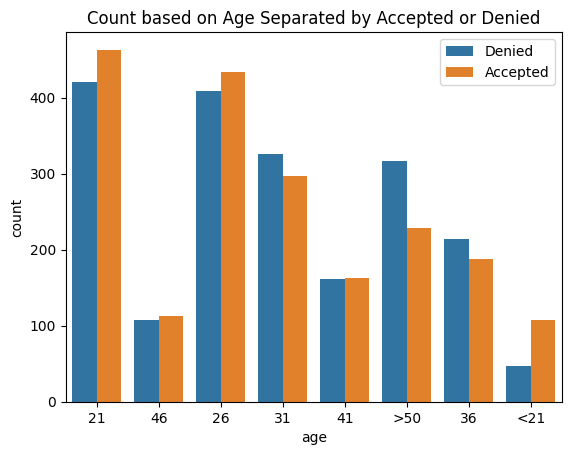

In [28]:
# Using a count plot it was obsevered that drivers younger than 26 years old were more likely to accept the Coffee House Coupon.
sns.countplot(Coffee_data,x='age',hue='Y')
plt.title('Count based on Age Separated by Accepted or Denied')
plt.legend(loc='upper right', labels=['Denied', 'Accepted'])
plt.show()

ages_lt26 = ['26', '<21', '21']
und_26 = np.isin(Coffee_data['age'],ages_lt26)
foc_data = Coffee_data[und_26]
rest = Coffee_data[(und_26) == False]
foc_accp = sum(foc_data['Y'] == 1)/len(foc_data)*100
rest_accp = sum(rest['Y'] == 1)/len(rest)*100


In [29]:
#The acceptance rate of those younger than 26 years old is slightly greater than those of other ages.
labels = ['Accepted','Denied']
rows = 1
cols = 2

subplot_titles = ['<26 yo','Other']
fig = make_subplots(rows=1, cols=2, subplot_titles=subplot_titles, print_grid=True, specs=[[{'type':'domain'}, {'type':'domain'}]])

fig.add_trace(go.Pie(labels=labels, values=[foc_accp,(100-foc_accp)]),
1, 1)
fig.add_trace(go.Pie(labels=labels, values=[rest_accp,(100-rest_accp)]),
1, 2)
    
fig.update_layout(title="<26 yo vs Other Ages", title_x=0.5)
fig.show()

This is the format of your plot grid:
[ (1,1)  ]  [ (1,2)  ]



In [30]:
#Conclusion
#It was observed that the following characteristics could indicate that someone is more inclined to accept the coffee house coupon:
#If a driver declares 'Student/Unemployed/Comp & Math' as an occupation, if the driver has no urgent place to go and is given between
#'10AM'-'2PM', and if the driver is younger than 26 years old.